# 人工智能实践-第三课-Mnist数据集使用

Created by Henry Huang

对应课程链接：https://www.icourse163.org/learn/PKU-1002536002?tid=1462067447#/learn/content?type=detail&id=1238898243&sm=1

---

导入数据集


In [2]:
import tensorflow as tf
mnist=tf.keras.datasets.mnist

In [7]:
import matplotlib.pyplot as plt

载入数据

- <font color=red>这里需要注意的就是：如果按照老师课上的代码直接写，是会需要梯子慢慢下载这个数据集的。</font>
- <font color=red>因此我们可以先到网上把数据集下载到本地，然后使用</font>mnist.load_data('本地路径\mnist.npz') <font color=red>加载数据集。</font>
- <font color=red>记得一定要加mnist.npz，否则程序会认为是load数据集到指定的路径，依然会下载下来，更有甚者会报错permission denied 就是他需要新建一个文件但是没有权限。</font>

In [6]:
(x_train,y_train),(x_test,y_test)=mnist.load_data(r'E:\AD_CSorJiangLab\MOOC-CS课程ppt+笔记\北大人工智能实践：tensorflow2\Code\mnist.npz')#加载本地数据集

看看数据集里面的图

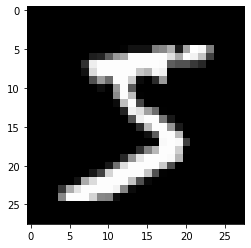

In [8]:
plt.imshow(x_train[0],cmap='gray')
plt.show()

In [11]:
print("x_train[0]:\n", x_train[0])

x_train[0]:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 2

In [12]:
print("y_train[0]:\n", y_train[0])

y_train[0]:
 5


In [13]:
print("x_test.shape:",x_test.shape)

x_test.shape: (10000, 28, 28)


In [14]:
print("x_train.shape:",x_train.shape)

x_train.shape: (60000, 28, 28)


---
## 1.sequential方式建立手写数字识别神经网络


要进行手写数字识别训练。课上使用的是sequential方式建模。

我们正好可以根据笔记复习一下sequential建模的八股（我是根据自己在markdown上的笔记先码一次，再看看老师的，对照一下，各位可以结合自己的笔记或者我的笔记看看）

可以不看老师代码建立一下模型。只依据总结出来的依据老师课上提供的以下信息：

1. 课上建立的是一个两层网络:
  - 第一层是relu的128个神经元。
  - 第二层是softmax的10个神经元(其实就是输出层了)
2. 使用adam优化
3. batchsize 是32, 训练5次，每训练一次测试一次结果。
4. 因为x_train 和 x_test 都是0到255，使用前进行归一化

### 第一步+第二步

第一步是import，上面已经执行了。

下面执行第二步，测试集和训练集的处理。

我们主要进行归一化，因为数据集本身已经分开了训练和测试。

In [28]:
x_train_normalized, x_test_normalized= x_train/255.0, x_test/255.0

### 第三步
构建模型

使用如下代码就可

- tf.keras.models.Sequential ([ 网络结构 ]) #描述各层网络
- 拉直层： tf.keras.layers.Flatten( )
- 全连接层： tf.keras.layers.Dense(神经元个数, activation= "激活函数“kernel_regularizer=哪种正则化)

千万不要忘了 Sequential ([ 网络结构 ]) 的中括号，不然报错

In [24]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation= 'relu', kernel_regularizer=tf.keras.regularizers.l2()),
    tf.keras.layers.Dense(10,activation= 'softmax',kernel_regularizer=tf.keras.regularizers.l2())
]) #描述各层网络
# 千万不要忘了[]  否则报错

### 第四步

配置优化方式

In [27]:
model.compile(optimizer = 'adam',
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
metrics = ['sparse_categorical_accuracy'] )

### 第五步
训练模型

val_sparse_categorical_accuracy是使用测试集测试的准确率

In [30]:
model.fit (x_train_normalized, y_train, 
batch_size=32 , epochs=5 , 
validation_data=(x_test_normalized,y_test),
validation_freq = 1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 51us/sample - loss: 0.8735 - sparse_categorical_accuracy: 0.8858 - val_loss: 0.7321 - val_sparse_categorical_accuracy: 0.9069
Epoch 2/5
60000/60000 [==============================] - 3s 42us/sample - loss: 0.7427 - sparse_categorical_accuracy: 0.8999 - val_loss: 0.7158 - val_sparse_categorical_accuracy: 0.9054
Epoch 3/5
60000/60000 [==============================] - 2s 41us/sample - loss: 0.7335 - sparse_categorical_accuracy: 0.9020 - val_loss: 0.7133 - val_sparse_categorical_accuracy: 0.9053
Epoch 4/5
60000/60000 [==============================] - 2s 41us/sample - loss: 0.7288 - sparse_categorical_accuracy: 0.9021 - val_loss: 0.7137 - val_sparse_categorical_accuracy: 0.9032
Epoch 5/5
60000/60000 [==============================] - 2s 40us/sample - loss: 0.7274 - sparse_categorical_accuracy: 0.9024 - val_loss: 0.6973 - val_sparse_categorical_accuracy: 0.9110


### 第六步
打印参数等模型统计数据

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          multiple                  0         
_________________________________________________________________
dense_12 (Dense)             multiple                  100480    
_________________________________________________________________
dense_13 (Dense)             multiple                  1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## 2.使用class方式建立神经网络模型

因为是第二讲说的class，我们这里也练习一下怎么使用class书写网络

复习一下流程
1. 在Mymodel中建立一个继承自Model的类，然后在其实写这个类的神经网络
2. model=Mymodel()创建一个这个类的实例
3. 其他代码与sequential法一致

### 第三步
因为一二步一样，所以直接省略了

In [59]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Flatten, Dense
class MnistModel(Model):
    def __init__(self):
        super(MnistModel,self).__init__()
        self.layer_input=Flatten()
        self.layer_one=Dense(128,activation= 'relu', kernel_regularizer=tf.keras.regularizers.l2())
        self.layer_two=Dense(10,activation= 'softmax',kernel_regularizer=tf.keras.regularizers.l2())#描述各层网络
    def call(self, x):
        y=self.layer_two(self.layer_one(self.layer_input(x)))
        return y #输出前向传播的结果
    
model2=MnistModel()

### 第四、五、六步
四五六步与上面代码一样

In [64]:
model2.compile(optimizer ='sgd',
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
metrics = ['sparse_categorical_accuracy'] )

In [65]:
model2.fit (x_train_normalized, y_train, 
batch_size=32 , epochs=10 , 
validation_data=(x_test_normalized,y_test),
validation_freq = 1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.7112 - sparse_categorical_accuracy: 0.9063 - val_loss: 0.6849 - val_sparse_categorical_accuracy: 0.9128
Epoch 2/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.6966 - sparse_categorical_accuracy: 0.9087 - val_loss: 0.6786 - val_sparse_categorical_accuracy: 0.9134
Epoch 3/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.6930 - sparse_categorical_accuracy: 0.9100 - val_loss: 0.6765 - val_sparse_categorical_accuracy: 0.9128
Epoch 4/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.6914 - sparse_categorical_accuracy: 0.9094 - val_loss: 0.6761 - val_sparse_categorical_accuracy: 0.9136
Epoch 5/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.6910 - sparse_categorical_accuracy: 0.9100 - val_loss: 0.6746 - val_sparse_categorical_accuracy: 0.9122
Epoch 6/10
6000

In [38]:
model2.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          multiple                  0         
_________________________________________________________________
dense_14 (Dense)             multiple                  100480    
_________________________________________________________________
dense_15 (Dense)             multiple                  1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
